# K-Means Clustering, MeanShift and Alggomerative Clustering


## Objectives

To compare the different unsupervised machine learning techniques.


### Import libraries

Lets first import the required libraries.


In [54]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
from sklearn import metrics

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.


### Load Data From CSV File

Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.


In [55]:
import pandas as pd
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


As you can see, **Address** in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.


In [56]:
df = cust_df.drop('Address', axis=1)
df.head()
df.shape

(850, 9)

#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [57]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.


In [58]:
km_list = list()

for clust in range(1,10):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(Clus_dataSet)    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

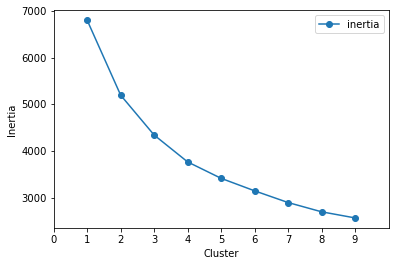

In [59]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,10,1))
ax.set_xlim(0,10)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [60]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
km=k_means.fit(Clus_dataSet)
df["Clus_km"] = km.predict(Clus_dataSet)
labels = k_means.labels_
#print(labels)
scr = metrics.silhouette_score(Clus_dataSet, k_means.labels_,
                                 metric="euclidean",)
print('Silhouette coefficient score: ',scr)

Silhouette coefficient score:  0.28738683325129355


<h2 id="insights">Insights</h2>

We assign the labels to each row in dataframe.


In [61]:
#df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.


In [62]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


Now, lets look at the distribution of customers based on their age and income:


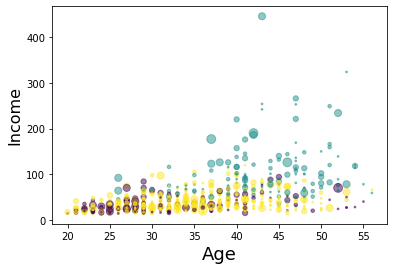

In [63]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


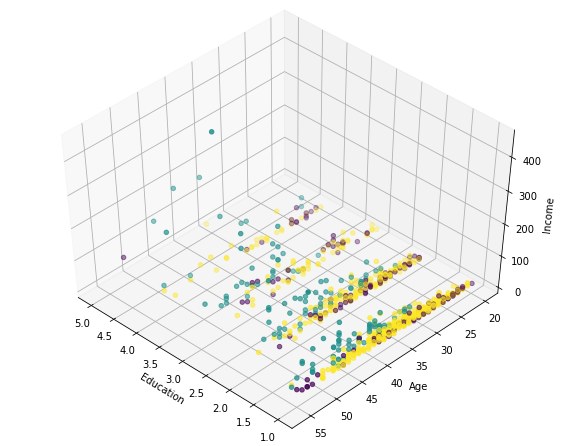

In [64]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


### Using MeanShift technique

In [65]:
from sklearn.cluster import MeanShift

#df=df.drop('Clus_km',axis=1)
ms= MeanShift(bandwidth=6)
ms=ms.fit(Clus_dataSet)
df['mns']=ms.predict(Clus_dataSet)
scr = metrics.silhouette_score(Clus_dataSet, ms.labels_,
                                 metric="euclidean",)
print('Silhouette coefficient score: ',scr)

Silhouette coefficient score:  0.6441851268946708


In [66]:
df.groupby('mns').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
mns,,,,,,,,,,
0,425.886905,34.897619,1.710714,8.391667,44.765476,1.435701,2.896362,0.254335,10.051071,1.441667
1,371.428571,45.428571,1.571429,21.428571,149.714286,14.559429,20.931286,1.000000,26.042857,1.000000
2,443.333333,47.666667,2.000000,27.333333,341.000000,10.797333,12.498000,0.500000,6.900000,1.000000


### Using Agglomerative Clustering technique

In [67]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
#df=df.drop('Clus_km',axis=1)
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
ag = ag.fit(Clus_dataSet)
df['agglom'] = ag.fit_predict(Clus_dataSet)
scr = metrics.silhouette_score(Clus_dataSet, ag.labels_,
                                 metric="euclidean",)
print('Silhouette coefficient score: ',scr)

Silhouette coefficient score:  0.24038167248549838


In [68]:
df.groupby('agglom').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km,mns
agglom,,,,,,,,,,,
0,426.014599,33.781022,1.835766,6.967153,41.405109,2.300350,4.187318,0.721311,15.490511,0.565693,0.000000
1,400.425287,45.172414,1.816092,20.482759,125.678161,3.944782,7.973839,0.102941,10.241379,1.045977,0.149425
2,429.672802,33.924335,1.621677,7.341513,35.572597,0.750112,1.586724,0.000000,7.178937,1.993865,0.000000


### Conclusion

The above K-means, MeanShift and Agglomerative techniques will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   AFFLUENT, EDUCATED AND OLD AGED
-   MIDDLE AGED AND MIDDLE INCOME
-   YOUNG AND LOW INCOME

MeanShift provides the best results in terms of the customer groupings and silhouette coefficient score of 0.64.

By training the models to input more historical data, I believe the prediction will be more accurate in future.